链式法则 + 前馈 + 反馈

Tensor 是动态图的基本单元，用于保存数据，包括标量、向量、矩阵、高维Tensor等
内部包含 data 和 grad，data保存节点数据 w，grad表示损失对w的偏导
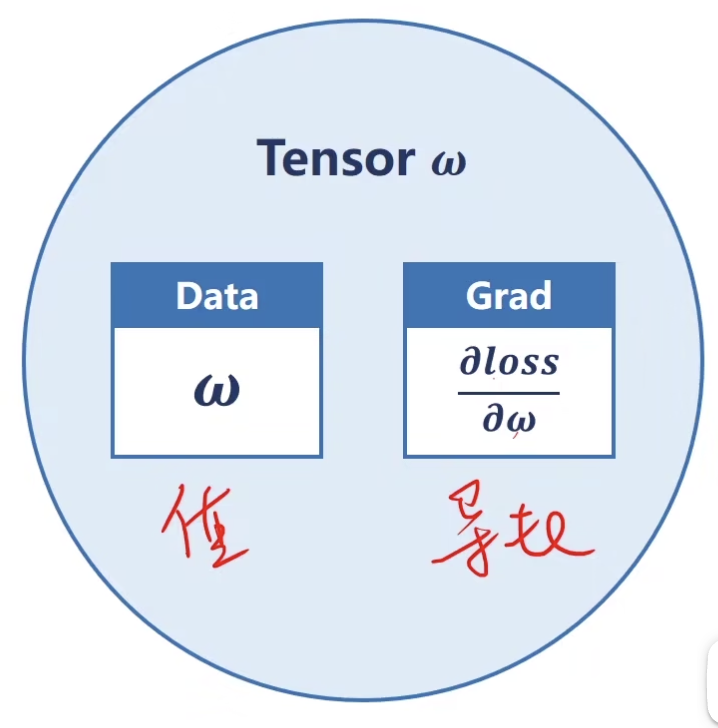

## 用 pytorch 实现线性回归

In [3]:
import torch

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = torch.Tensor([1.0])
w.requires_grad = True

def forward(x):
    # 此处有自动类型转换，x自动转换为tensor，和w作矩阵乘法
    return x * w

def loss(x, y):
    y_pred = forward(x)
    # 代码是在构建计算图，不是在做计算
    return (y_pred - y) ** 2

print('predict (before training)', 4, forward(4).item())

# 前馈计算100轮
for epoch in range(100):
    for x, y in zip(x_data, y_data):
        # 正向前馈，计算出损失
        l = loss(x, y)
        # 反馈，计算梯度
        l.backward()
        print('\tgrad:', x, y, w.grad.item())
        # 使用梯度更新权重参数
        w.data = w.data - 0.01 * w.grad.data
        # 把权重中梯度的数据清零
        w.grad.data.zero_()
    print('progress:', epoch, l.item())

print('predict (after training)', 4, forward(4).item())

predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress: 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress: 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress: 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress: 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress: 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
progress: 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
progress: 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.